In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, sosfilt, sosfreqz
import os

In [2]:

wav_path = 'press_actuator.wav'

if not os.path.exists(wav_path):
    raise FileNotFoundError(f"WAV file not found: {wav_path}")

sample_rate, data = wavfile.read(wav_path)

# Normalize if needed
#if data.dtype != np.float32:
#    data = data / np.max(np.abs(data))

# Handle stereo by selecting one channel
if data.ndim > 1:
    data = data[:, 0]

print(f"Loaded '{wav_path}' at {sample_rate} Hz")

Loaded 'press_actuator.wav' at 44100 Hz


/var/folders/kd/v3035tq94wdfg4dqh988_zcr0000gp/T/ipykernel_23700/3826525947.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(wav_path)


In [3]:
def design_lowpass_filter(cutoff_hz, sample_rate):
    # 4th-order Butterworth lowpass (two biquads)
    sos = butter(N=4, Wn=cutoff_hz, btype='low', fs=sample_rate, output='sos')
    return sos

cutoff_freq = 10  # Hz (adjustable)
sos = design_lowpass_filter(cutoff_freq, sample_rate)

In [4]:
filtered_data = sosfilt(sos, data)
# Normalize filtered signal
#filtered_data = filtered_data / np.max(np.abs(filtered_data))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


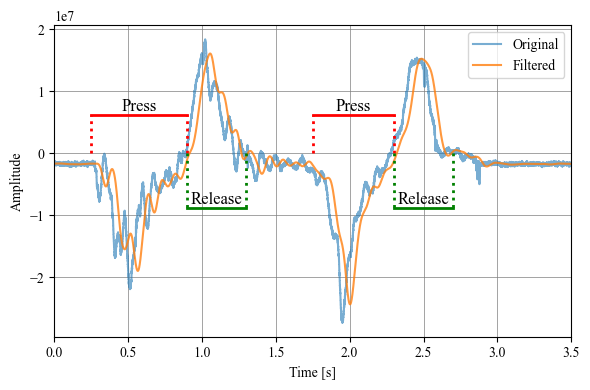

In [47]:
#set Times New Roman as the default font
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

time = np.arange(len(data)) / sample_rate

# Set the time range to zoom in (in seconds)
start_time = 5.5
end_time = 9

# Convert to sample indices
start_idx = int(start_time * sample_rate)
end_idx = int(end_time * sample_rate)
range_idx = end_idx - start_idx

plt.figure(figsize=(6,4))
plt.plot(time[0:range_idx], data[start_idx:end_idx], label='Original', alpha=0.6)
plt.plot(time[0:range_idx], filtered_data[start_idx:end_idx], label='Filtered', alpha=0.8)

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, color='tab:gray', linestyle='-', linewidth=0.5)

# Updated bracket function
def add_bracket(ax, x0, x1, y, text, colour='k', text_pos='bottom', height=0.02):
    line_width = 2
    # Draw dotted horizontal bracket
    ax.plot([x0, x1], [y + height, y + height], color=colour, lw=line_width, linestyle='-')
    # Short vertical ends of bracket
    ax.plot([x0, x0], [y, y + height], color=colour, lw=line_width)
    ax.plot([x1, x1], [y, y + height], color=colour, lw=line_width)
    # Vertical lines down to x-axis
    ax.plot([x0, x0], [0, y], color=colour, lw=line_width, linestyle=':')
    ax.plot([x1, x1], [0, y], color=colour, lw=line_width, linestyle=':')
    # Add text label
    ax.text((x0 + x1) / 2, y + height + 0.005, text,
            ha='center', va='bottom', fontsize=12)

# Get current axis
ax = plt.gca()
y_min, y_max = ax.get_ylim()

#ax.set_ylim([-180,180])
ax.set_xlim([0,3.5])

# Bracket height positioning
press_y = y_max * 0.3
release_y = y_min * 0.3
#bracket_y = y_min * 0.9
add_bracket(ax, 0.25, 0.9, press_y, "Press",'r')
add_bracket(ax, 0.9, 1.3, release_y, "Release",'g')
add_bracket(ax, 1.75, 2.3, press_y, "Press",'r')
add_bracket(ax, 2.3, 2.7, release_y, "Release",'g')

plt.tight_layout()
plt.savefig('outputs/press_actuator_waveform.eps', format='eps')
plt.show()